In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers 

inputs = keras.Input(shape=(180, 180, 3)) #input 180x180 boyutunda rgb şekilde alıyoruz
x = layers.Rescaling(1./255)(inputs)  # renk aralığını 0 ile 1 arasına çekiyoruz
# Gelen görüntünün boyutu kadar pixellerin değeri matrise yazılır
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x) # filtre boyutu kadar görüntünün her bir
# pixelini poolingin boyutu kadar işledik

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x) #Matrisi Vektör haline getirdik
outputs = layers.Dense(1, activation="sigmoid")(x) # Veri seti 2'li olduğu için
# aktivasyon fonksiyonu olarak sigmoid seçtik

model = keras.Model(inputs=inputs, outputs=outputs) #Girdi ve çıktı katmanlarını aktardık
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 86, 86, 64)        18496     
                                                           

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"]) # Modelin kayıp ve eğitim algoritmalarını belirledik

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory 
# Veri setlerini modelin girdi katmanındaki boyuta uygun olarak tanımladık
train_dataset = image_dataset_from_directory("/content/drive/MyDrive/ColabNotebooks/dataset/bird_vs_drone/train", 
                                             image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory("/content/drive/MyDrive/ColabNotebooks/dataset/bird_vs_drone/validation",
                                                  image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/ColabNotebooks/dataset/bird_vs_drone/test", 
                                            image_size=(180, 180), batch_size=32)

Found 646 files belonging to 2 classes.
Found 90 files belonging to 2 classes.
Found 194 files belonging to 2 classes.


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint( # Verilerin doğruluk
    filepath="convnet_from_scratch.keras",  # değerlerini .keras 
    save_best_only=True,                    # dosyasına kayıt ettik
    monitor="val_loss")
]

history = model.fit( # eğitim verisi ile 
 train_dataset,      # doğrulama verisi karşılaştırdık
 epochs=30,          
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
21/21 [==============================] - 8s 210ms/step - loss: 0.6768 - accuracy: 0.5480 - val_loss: 0.6906 - val_accuracy: 0.5333
Epoch 2/30
21/21 [==============================] - 7s 207ms/step - loss: 0.6154 - accuracy: 0.6703 - val_loss: 0.5626 - val_accuracy: 0.7444
Epoch 3/30
21/21 [==============================] - 7s 203ms/step - loss: 0.4568 - accuracy: 0.7740 - val_loss: 0.4814 - val_accuracy: 0.7889
Epoch 4/30
21/21 [==============================] - 7s 209ms/step - loss: 0.4052 - accuracy: 0.8406 - val_loss: 0.6367 - val_accuracy: 0.6222
Epoch 5/30
21/21 [==============================] - 7s 207ms/step - loss: 0.4454 - accuracy: 0.7817 - val_loss: 0.5338 - val_accuracy: 0.7333
Epoch 6/30
21/21 [==============================] - 7s 205ms/step - loss: 0.3300 - accuracy: 0.8622 - val_loss: 0.6758 - val_accuracy: 0.6889
Epoch 7/30
21/21 [==============================] - 7s 200ms/step - loss: 0.2848 - accuracy: 0.8978 - val_loss: 0.5426 - val_accuracy: 0.7778
Epoch 

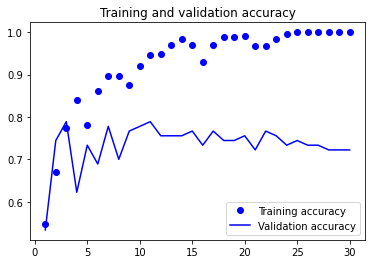

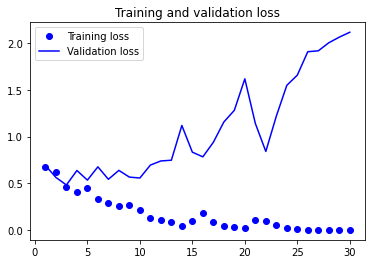

In [ ]:
import matplotlib.pyplot as plt 
# Karşılaştırılan verileri grafikte karşılaştırdık
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras") #test verilerinin doğruluk
test_loss, test_acc = test_model.evaluate(test_dataset)            # oranını hesapladık
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 1s 34ms/step - loss: 0.7420 - accuracy: 0.6082
Test accuracy: 0.608


In [ ]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), 
                                      layers.RandomZoom(0.2),]) # Veriyi sayısını artırmak için data augmentationu kullandık

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)    # Yeni verileri modele ilettik 
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)   # overfitting olmaması için drop out kullandık

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
] 
  # Data augmention ile gelen yeni veriler ile eğitimi tekrarladık
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks) 

Epoch 1/100
21/21 [==============================] - 9s 222ms/step - loss: 0.8599 - accuracy: 0.4845 - val_loss: 0.6938 - val_accuracy: 0.4667
Epoch 2/100
21/21 [==============================] - 7s 201ms/step - loss: 0.6905 - accuracy: 0.5031 - val_loss: 0.7898 - val_accuracy: 0.5333
Epoch 3/100
21/21 [==============================] - 7s 210ms/step - loss: 0.7024 - accuracy: 0.5495 - val_loss: 0.6924 - val_accuracy: 0.5333
Epoch 4/100
21/21 [==============================] - 7s 212ms/step - loss: 0.6760 - accuracy: 0.5588 - val_loss: 0.6335 - val_accuracy: 0.5333
Epoch 5/100
21/21 [==============================] - 7s 208ms/step - loss: 0.6986 - accuracy: 0.5418 - val_loss: 0.6797 - val_accuracy: 0.5111
Epoch 6/100
21/21 [==============================] - 7s 205ms/step - loss: 0.6818 - accuracy: 0.5557 - val_loss: 0.6855 - val_accuracy: 0.5556
Epoch 7/100
21/21 [==============================] - 7s 209ms/step - loss: 0.7055 - accuracy: 0.6006 - val_loss: 0.6679 - val_accuracy: 0.5889

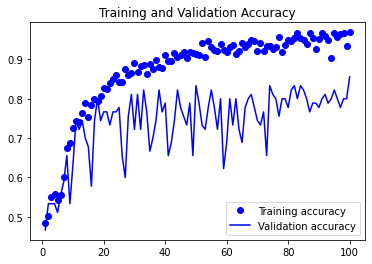

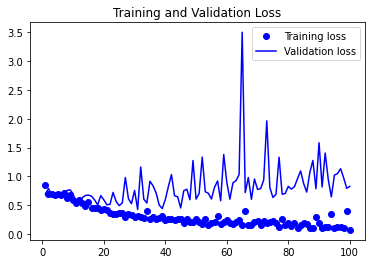

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
 # Çıkan sonucu karşılaştırmak için grafikte gösterdik
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") # Eğitim sonucunda çıkan doğruluk değerini gösterdik

7/7 [==============================] - 1s 34ms/step - loss: 0.7623 - accuracy: 0.6546
Test accuracy: 0.655
